In [133]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, exp, pi
from matplotlib.colors import LogNorm
import matplotlib
from scipy.special import spherical_in as In
from scipy.special import spherical_kn as Kn
from sympy.physics.wigner import gaunt, wigner_3j
from scipy.special import sph_harm
from math import floor, atan2, acos, isnan, factorial

In [138]:
def Cylindrical(r, phi, theta, L, cbar , crho):

    sign_def = 1
    pot = 0
    for n in range(20):
        
        pot += sign_def * pow(r*cbar*sph_harm(0, L, phi, theta), 2*n)/factorial(n)
        sign_def *= -1

    return  exp(-(r**2)/(crho**2))*pot

In [141]:

def Cartesian():
    Co = 1*0
    Zc = 15*0
    c = 1.326
    co = 3.248
    crho = 2.778
    d = 1.643
    a1 = 10.804*0
    b1 = 0.466
    L = 2.3

    x_array = np.linspace(-6 , 6, 100)
    z_array = np.linspace(-6 , 6, 100)
    y = 0
    pot_value = np.zeros((z_array.size,x_array.size))
    pot_value_line = np.zeros(x_array.size)


    for i, x in enumerate(x_array):
        for j, z in enumerate(z_array):

            r = sqrt(x**2 + (z - L/2)**2 + y**2) + 0.01

            f =  -Co/(2*r) - Zc/(2*r)*exp(-r/c) + a1*exp(-r/b1)

            r = sqrt(x**2 + (z + L/2)**2 + y**2) + 0.01
            rho = sqrt(x**2 + y**2) + 0.01

            f +=  -Co/(2*r) - Zc/(2*r)*exp(-r/c) + a1*exp(-r/b1)

            f += d*exp(-(z/co)**2)*exp(-(rho/crho)**2)

            pot_value[j, i] = f

    for j, z in enumerate(z_array):
        x = 0
        r = sqrt(x**2 + (z - L/2)**2 + y**2) + 0.01

        f =  -Co/(2*r) - Zc/(2*r)*exp(-r/c) + a1*exp(-r/b1)

        r = sqrt(x**2 + (z + L/2)**2 + y**2) + 0.01
        f +=  -Co/(2*r) - Zc/(2*r)*exp(-r/c) + a1*exp(-r/b1)

        rho = sqrt(x**2 + y**2) + 0.01
        f += d*exp(-(z/co)**2)*exp(-(rho/crho)**2)

        pot_value_line[j] = f

    pot_value = pot_value / abs(pot_value).max()
    pot_value_line = pot_value_line / abs(pot_value_line).max()

    return pot_value, pot_value_line


In [142]:
def Spherical():
    Co = 1*0
    Zc = 15*0
    c = 1.326
    co = 3.248
    crho = 2.778
    d = 1.643
    a1 = 10.804*0
    b1 = 0.466
    cc = (1/co)**2 - (1/crho)**2
    cbar = sqrt((4*pi)/3)*cc
    L = 2.3

    x_array = np.linspace(-6 , 6, 100)
    z_array = np.linspace(-6 , 6, 100)
    y = 0
    Ro = L/2
    pot_value = np.zeros((z_array.size,x_array.size))
    pot_value_line = np.zeros(x_array.size)

    for i, x in enumerate(x_array):
        for j, z in enumerate(z_array):
            
            r = sqrt(x**2 + z**2 + y**2) + 0.01
            phi = atan2(y, x)
            if phi <0:
                phi = 2*pi + phi
            theta = acos(z/r)

            coulomb = 0
            yukawa = 0
            exponential = 0
            if r <= Ro:

                for L in range(0, 60, 2):
                    
                    coulomb += sqrt((4*pi)/(2*L + 1))*(r**L)/(Ro**(L+1))*sph_harm(0, L, phi, theta)
                    yukawa += 8*(1/c)*sqrt((2*L + 1)/(4*pi))*In(L, (1/c)*r)*Kn(L, (1/c)*Ro)*sph_harm(0, L, phi, theta)
            
                    exponential_a = In(L, (1/b1)*r)*Kn(L, (1/b1)*Ro)
                    exponential_b = (1/b1)*(In(L, (1.0/b1)*r, True)*Kn(L, (1.0/b1)*Ro)*r + In(L, (1.0/b1)*r)*Kn(L, (1.0/b1)*Ro, True)*Ro)

                    exponential +=  -a1*16*sqrt((2*L + 1)/(4*pi)) *(exponential_a + exponential_b)*sph_harm(0, L, phi, theta)

                    
            if r > Ro:

                for L in range(0, 60, 2):
                    
                    coulomb += sqrt((4*pi)/(2*L + 1))*(Ro**L)/(r**(L+1))*sph_harm(0, L, phi, theta)
                    yukawa += 8*(1/c)*sqrt((2*L + 1)/(4*pi))*In(L, (1/c)*Ro)*Kn(L, (1/c)*r)*sph_harm(0, L, phi, theta)

                    exponential_a = In(L, (1/b1)*Ro)*Kn(L, (1/b1)*r)
                    exponential_b = (1/b1)*(In(L, (1.0/b1)*Ro, True)*Kn(L, (1.0/b1)*r)*Ro + In(L, (1.0/b1)*Ro)*Kn(L, (1.0/b1)*r, True)*r)

                    exponential +=  -a1*16*sqrt((2*L + 1)/(4*pi)) *(exponential_a + exponential_b)*sph_harm(0, L, phi, theta)
    
            
            cylinder = d*Cylindrical(r, phi, theta, L, cbar, crho)
          
            pot_value[j, i] = -Co*abs(coulomb) + -Zc*abs(yukawa) + exponential + cylinder

    for j, z in enumerate(z_array):
        
        x = 0
        r = sqrt(x**2 + z**2 + y**2) + 0.01
        phi = atan2(y, x)
        if phi <0:
            phi = 2*pi + phi
        theta = acos(z/r)

        coulomb = 0
        yukawa = 0
        exponential = 0
        if r <= Ro:

            for L in range(0, 60, 2):
                
                coulomb += sqrt((4*pi)/(2*L + 1))*(r**L)/(Ro**(L+1))*sph_harm(0, L, phi, theta)
                yukawa += 8*(1/c)*sqrt((2*L + 1)/(4*pi))*In(L, (1/c)*r)*Kn(L, (1/c)*Ro)*sph_harm(0, L, phi, theta)
        
                exponential_a = In(L, (1/b1)*r)*Kn(L, (1/b1)*Ro)
                exponential_b = (1/b1)*(In(L, (1.0/b1)*r, True)*Kn(L, (1.0/b1)*Ro)*r + In(L, (1.0/b1)*r)*Kn(L, (1.0/b1)*Ro, True)*Ro)

                exponential +=  -a1*16*sqrt((2*L + 1)/(4*pi)) *(exponential_a + exponential_b)*sph_harm(0, L, phi, theta)

        if r > Ro:

            for L in range(0, 60, 2):
                
                coulomb += sqrt((4*pi)/(2*L + 1))*(Ro**L)/(r**(L+1))*sph_harm(0, L, phi, theta)
                yukawa += 8*(1/c)*sqrt((2*L + 1)/(4*pi))*In(L, (1/c)*Ro)*Kn(L, (1/c)*r)*sph_harm(0, L, phi, theta)

                exponential_a = In(L, (1/b1)*Ro)*Kn(L, (1/b1)*r)
                exponential_b = (1/b1)*(In(L, (1.0/b1)*Ro, True)*Kn(L, (1.0/b1)*r)*Ro + In(L, (1.0/b1)*Ro)*Kn(L, (1.0/b1)*r, True)*r)

                exponential +=  -a1*16*sqrt((2*L + 1)/(4*pi)) *(exponential_a + exponential_b)*sph_harm(0, L, phi, theta)

    
        cylinder = d*Cylindrical(r, phi, theta, L, cbar, crho)
          
        pot_value_line[j] = -Co*abs(coulomb) + -Zc*abs(yukawa) + exponential + cylinder

    pot_value = pot_value / abs(pot_value).max()
    pot_value_line = pot_value_line / abs(pot_value_line).max()

    return pot_value, pot_value_line



/tmp/ipykernel_15177/3278237333.py:61: ComplexWarning: Casting complex values to real discards the imaginary part
  pot_value[j, i] = -Co*abs(coulomb) + -Zc*abs(yukawa) + exponential + cylinder
/tmp/ipykernel_15177/3278237333.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  pot_value_line[j] = -Co*abs(coulomb) + -Zc*abs(yukawa) + exponential + cylinder


0.12506370054851984


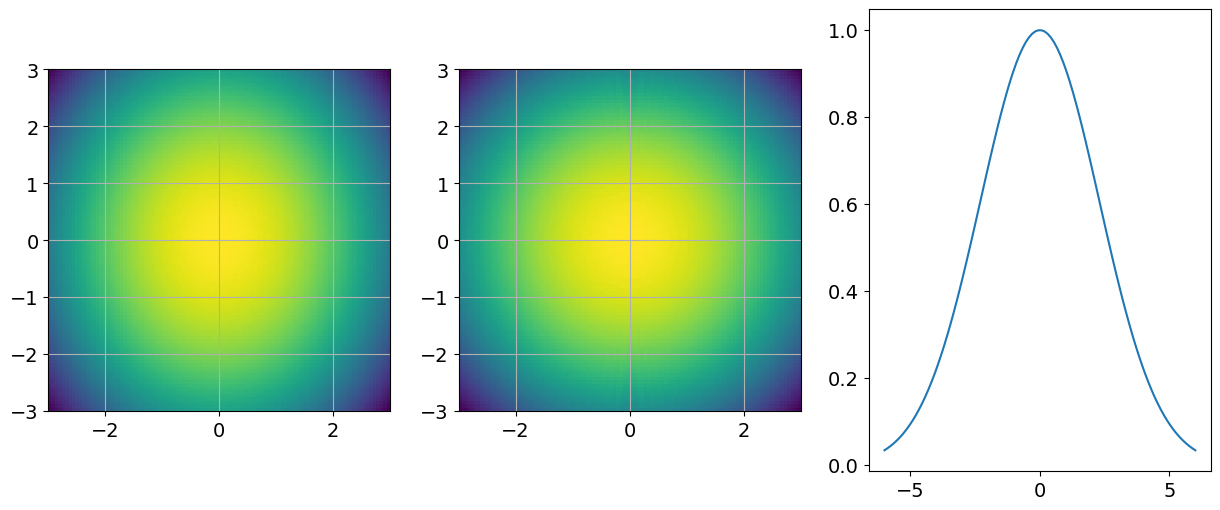

In [144]:
nrow = 1; ncol = 3;
matplotlib.rcParams.update({'font.size': 14})
fig, axs = plt.subplots(nrows=nrow, ncols=ncol, figsize=(15, 6))


pot_value_car, pot_value_car_line  = Cartesian()
pos = axs[0].imshow(abs(pot_value_car), extent=[-3, 3, -3, 3], norm=LogNorm())
# plt.colorbar(pos, ax=axs[0])
axs[0].grid()

pot_value_sph, pot_value_sph_line = Spherical()
pos = axs[1].imshow(abs(pot_value_sph), extent=[-3, 3, -3, 3], norm=LogNorm())
# plt.colorbar(pos, ax=axs[1])
axs[1].grid()

axs[2].plot(np.linspace(-6 , 6, 100), pot_value_car_line)
# axs[2].plot(pot_value_sph_line)

error = abs(pot_value_car - pot_value_sph)

print(error.max())

